In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Failed_Bank_Dataset_2.csv')

In [3]:
df.head()

,Bank_Name,City,State,Cert,Acquiring_Institution,Closing_Date,Estimated_Loss,Total_Assets,Total_Deposits
0,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",2023-05-01,NaN,212638872000,176436706000
1,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",2023-03-12,2.400000e+09,110363650000,88612911000
2,Silicon Valley Bank,Santa Clara,CA,24735,First–Citizens Bank & Trust Company,2023-03-10,1.610000e+10,209026000000,175378000000
3,Almena State Bank,Almena,KS,15426,Equity Bank,2020-10-23,1.633000e+07,65733000,64941000
4,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",2020-10-16,7.247000e+06,136566000,133936000


In [4]:
df.shape

(566, 9)

In [5]:
df.isnull().sum()

Bank_Name                0
City                     0
State                    0
Cert                     0
Acquiring_Institution    0
Closing_Date             0
Estimated_Loss           2
Total_Assets             0
Total_Deposits           0
dtype: int64

In [6]:


df['Estimated_Loss'].fillna(df['Estimated_Loss'].mean(), inplace=True)


In [7]:
df.isnull().sum()

Bank_Name                0
City                     0
State                    0
Cert                     0
Acquiring_Institution    0
Closing_Date             0
Estimated_Loss           0
Total_Assets             0
Total_Deposits           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Bank_Name              566 non-null    object 
 1   City                   566 non-null    object 
 2   State                  566 non-null    object 
 3   Cert                   566 non-null    int64  
 4   Acquiring_Institution  566 non-null    object 
 5   Closing_Date           566 non-null    object 
 6   Estimated_Loss         566 non-null    float64
 7   Total_Assets           566 non-null    int64  
 8   Total_Deposits         566 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 39.9+ KB


In [9]:
df.dtypes.value_counts()


object     5
int64      3
float64    1
dtype: int64

#Number of failed bank per State

In [10]:


df['State'].value_counts()


GA    93
FL    76
IL    69
CA    43
MN    23
WA    19
MO    16
AZ    16
MI    14
TX    13
NV    12
KS    11
WI    11
PA    10
SC    10
CO    10
MD    10
OH     9
UT     8
NJ     8
TN     7
OK     7
AL     7
NC     7
NY     6
OR     6
VA     5
PR     4
LA     4
AR     4
NE     4
NM     3
IN     3
KY     3
WV     2
IA     2
MS     2
CT     2
ID     2
MA     1
SD     1
WY     1
NH     1
HI     1
Name: State, dtype: int64

<ipython-input-27-796eb05c8e69>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="State", data=df, palette="hls")


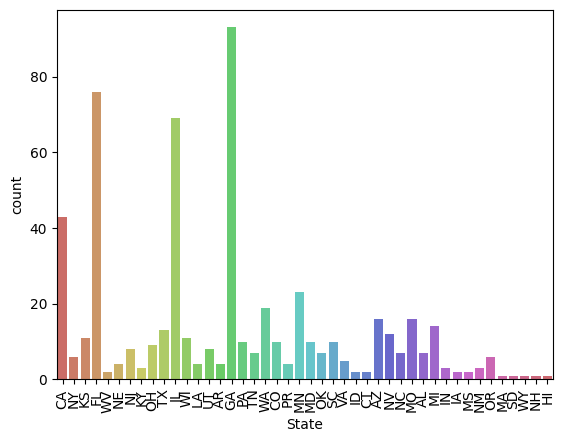

In [27]:


import matplotlib.pyplot as plt
sns.countplot(x="State", data=df, palette="hls")
plt.xticks(rotation=90)
plt.show()


#Acquiring Institution

In [46]:
# prompt: show the count of unique Acquiring_Institution

acquiring_institutions = df['Acquiring_Institution'].value_counts()
unique_acquiring_institutions = df['Acquiring_Institution'].nunique()
print(f"Number of unique Acquiring_Institution: {unique_acquiring_institutions}")



Number of unique Acquiring_Institution: 300


#Number of failed bank per institution


In [16]:


acquiring_institutions = df['Acquiring_Institution'].value_counts()
for name, count in acquiring_institutions.items():
  print(f"{name}: {count}")


No Acquirer: 31
State Bank and Trust Company: 12
First-Citizens Bank & Trust Company: 11
Ameris Bank: 10
U.S. Bank N.A.: 9
Community & Southern Bank: 8
Bank of the Ozarks: 7
Stearns Bank, N.A.: 7
Centennial Bank: 7
Republic Bank of Chicago: 6
Central Bank: 6
CenterState Bank of Florida, N.A.: 6
MB Financial Bank, N.A.: 6
Premier American Bank, N.A.: 5
CertusBank, National Association: 5
Columbia State Bank: 5
Sunwest Bank: 5
Great Southern Bank: 5
U.S. Bank, N.A.: 5
United Fidelity Bank, fsb: 5
Umpqua Bank: 4
Simmons First National Bank: 4
First Financial Bank, N.A.: 4
Northbrook Bank & Trust Company: 4
IBERIABANK: 4
Hamilton State Bank: 4
Stonegate Bank: 4
First Midwest Bank: 4
City National Bank: 4
First Federal Bank of Florida: 4
Heartland Bank and Trust Company: 4
United Bank: 4
CharterBank: 3
Liberty Bank and Trust Company: 3
Bank of North Carolina: 3
Capital Bank, N.A.: 3
Fidelity Bank: 3
Heritage Bank: 3
First Citizens Bank and Trust Company, Inc.: 3
Florida Community Bank, a di

#Number of failed banks per year

In [18]:
# Extract year from Closing_Date column
df['Closing_Year'] = pd.to_datetime(df['Closing_Date']).dt.year

# Group data by Closing_Year and count number of banks failed
failed_banks_per_year = df.groupby('Closing_Year')['Bank_Name'].count()

# Print the result
print(failed_banks_per_year)

Closing_Year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
2019      4
2020      4
2023      3
Name: Bank_Name, dtype: int64


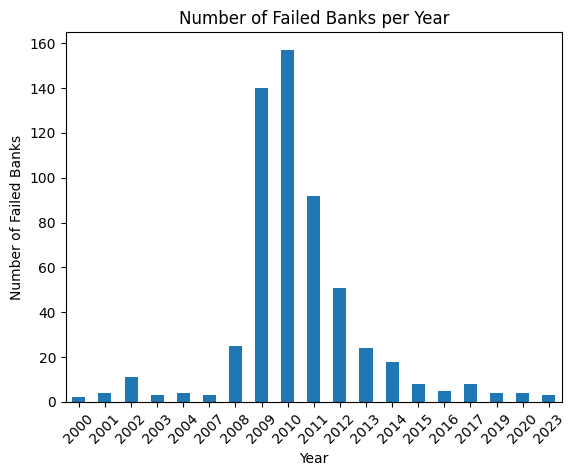

In [19]:




# Plot the number of failed banks per year
failed_banks_per_year.plot(kind='bar')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Failed Banks')
plt.title('Number of Failed Banks per Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


#Exploring the categorical features

In [35]:

categorical_features=[feature for feature in df.columns if (df[feature].dtypes=='O')]
categorical_features

['Bank_Name', 'City', 'State', 'Acquiring_Institution', 'Closing_Date']

In [38]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Bank_Name and number of categories are 548
The feature is City and number of categories are 434
The feature is State and number of categories are 44
The feature is Acquiring_Institution and number of categories are 300
The feature is Closing_Date and number of categories are 261


#Exploring the Numerical Feature

In [39]:


numerical_features = [feature for feature in df.columns if (df[feature].dtypes != 'O')]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  5


,Cert,Estimated_Loss,Total_Assets,Total_Deposits,Closing_Year
0,59017,1.620317e+08,212638872000,176436706000,2023
1,57053,2.400000e+09,110363650000,88612911000,2023
2,24735,1.610000e+10,209026000000,175378000000,2023
3,15426,1.633000e+07,65733000,64941000,2020
4,16748,7.247000e+06,136566000,133936000,2020


In [40]:
#Find Discrete Numerical Features
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [41]:
#Find Continous Numerical Features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['label']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 4


<ipython-input-42-1e178edfb8e8>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
<ipython-input-42-1e178edfb8e8>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
<ipython-input-42-1e178edfb8e8>:7: UserWarning: 

`distplot` is a deprecated function 

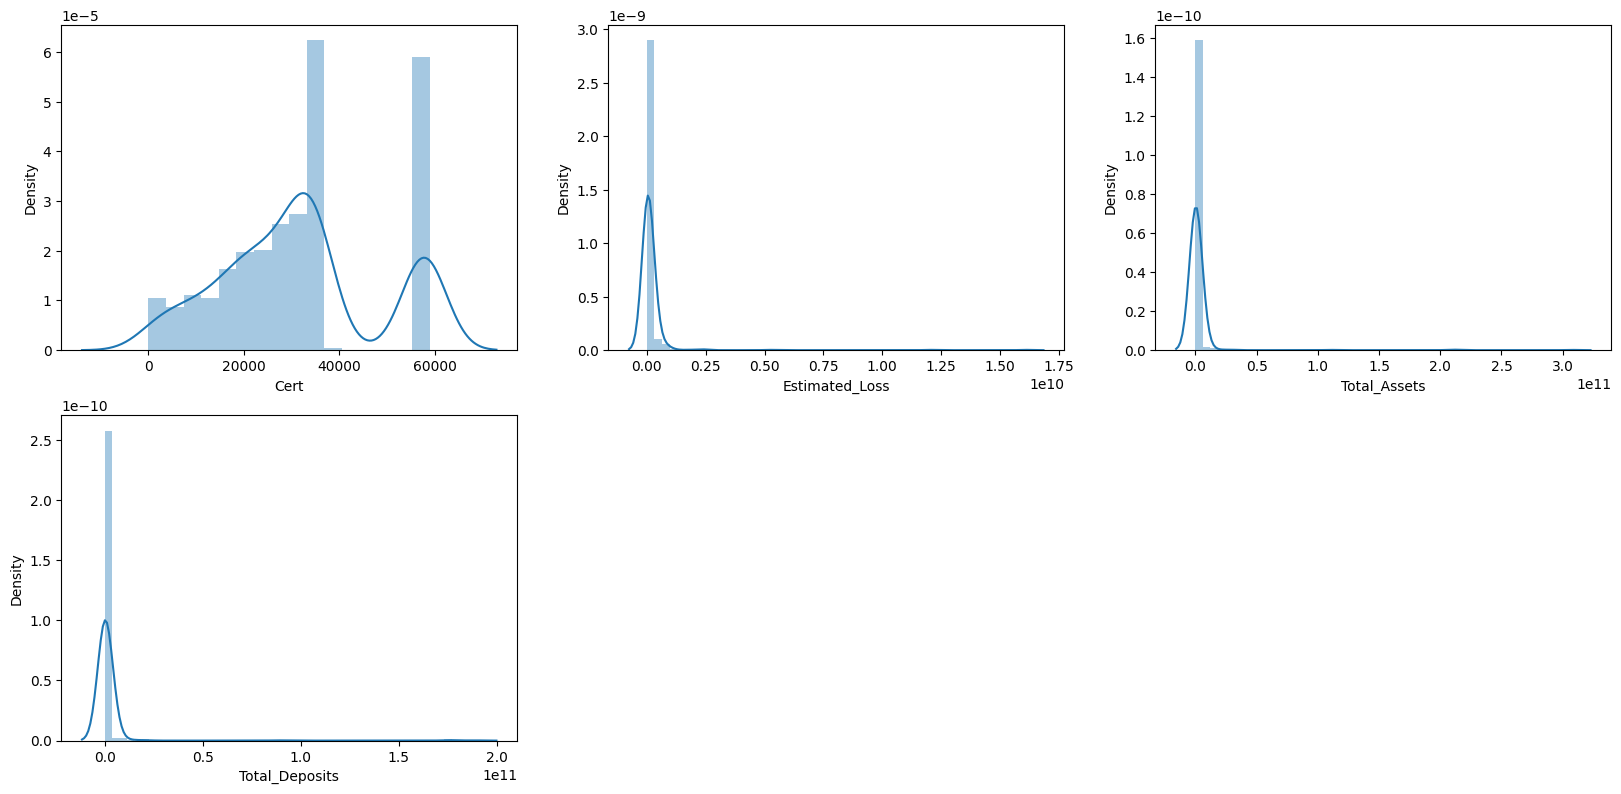

In [42]:
#Distribution of Continous Numerical Features
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

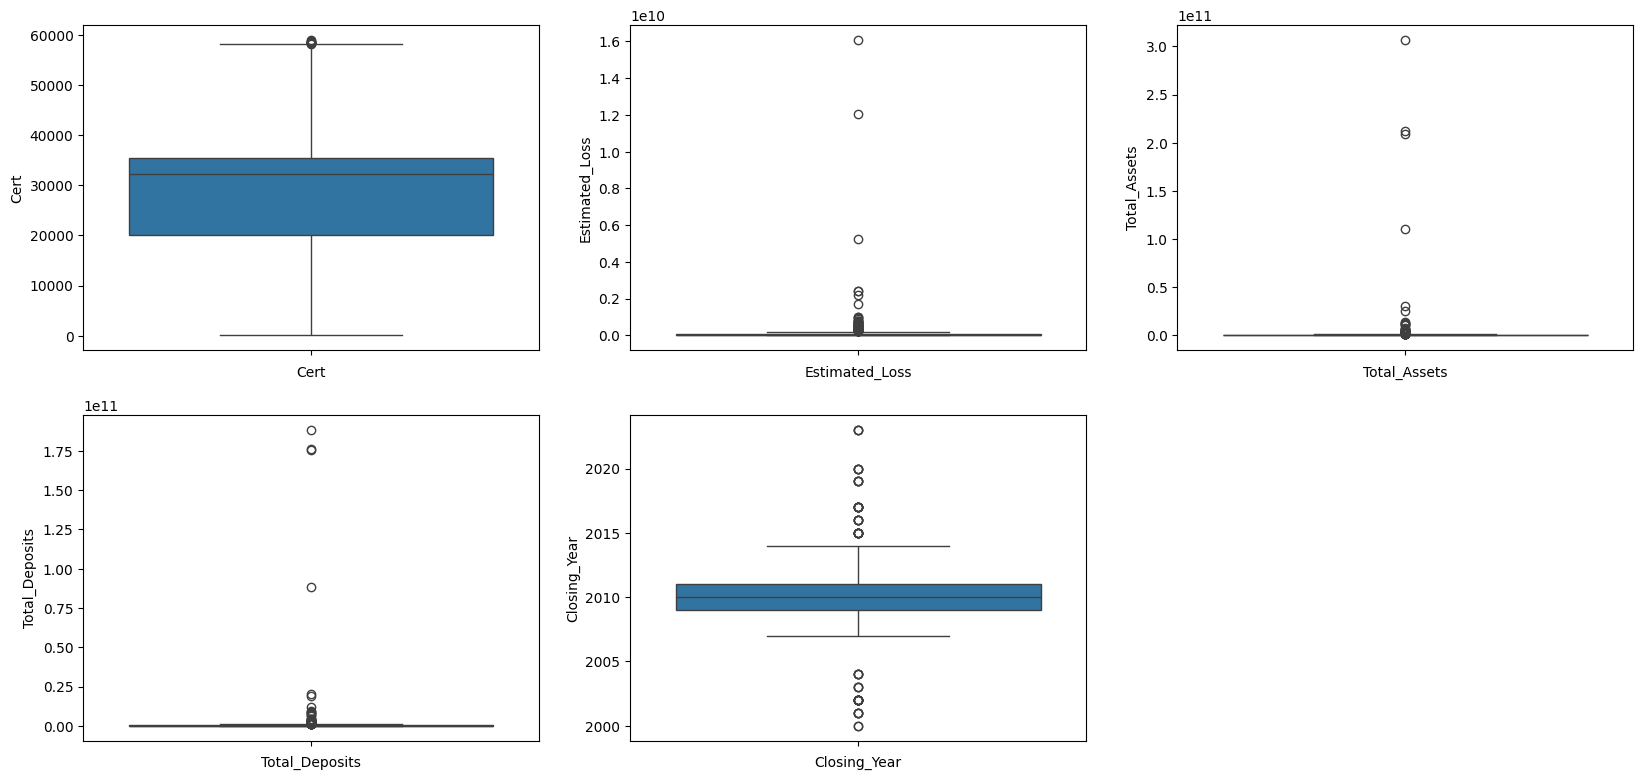

In [43]:
#Find Outliers in numerical features
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()